## MACHINE LEARNING MODEL FOR FOOD ADULTERATION ANALYSIS

In [ ]:
Import warnings
warnings.filterwarnings('ignore')
import joblib
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

SyntaxError: invalid syntax (_metadata_requests.py, line 1512)

In [39]:
#pip install imbalanced-learn


In [40]:
df=pd.read_csv('food_adulteration.csv')

In [2]:
df.head()

NameError: name 'df' is not defined

## Data preprocessing:

In [3]:
df.shape

NameError: name 'df' is not defined

In [4]:
df.info()

NameError: name 'df' is not defined

In [44]:
df.describe()

,adulteration_id
count,900.000000
mean,500.355556
std,289.967319
min,1.000000
25%,248.750000
50%,499.500000
75%,755.250000
max,1000.000000


In [45]:
df.nunique()

adulteration_id     900
product_name         10
brand                 5
category              5
adulterant            5
detection_date      181
detection_method      4
severity              3
health_risk           3
action_taken          4
dtype: int64

## Data cleaning:

In [46]:
# to check the null values:
df.isnull().sum()

adulteration_id     0
product_name        0
brand               0
category            0
adulterant          0
detection_date      0
detection_method    0
severity            0
health_risk         0
action_taken        0
dtype: int64

In [47]:
# to check the duplicate values:
df.duplicated().sum()

0

In [48]:
df = resample(df, replace=True, n_samples=16500, random_state=42)


In [49]:
df.shape

(16500, 10)

## Exploratory data anlaysis:

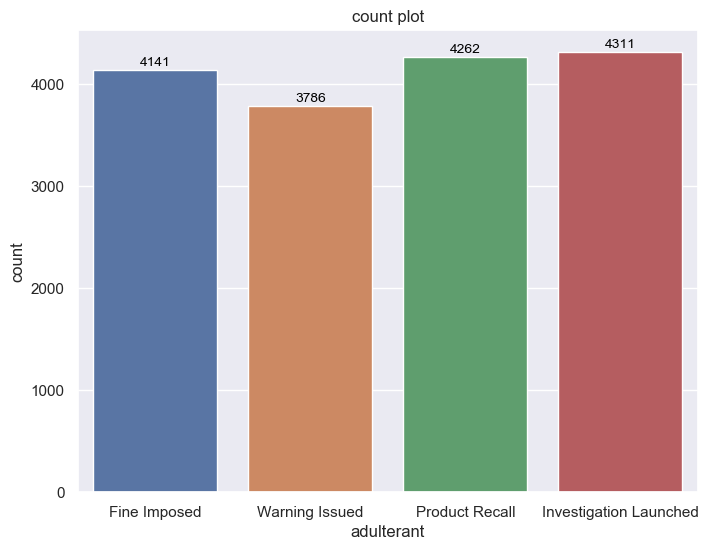

In [50]:
# count plot for adulterant column:
sns.set(style="darkgrid")
plt.figure(figsize=(8,6))
ax=sns.countplot(x='action_taken',data=df)
plt.title('count plot')
plt.xlabel('adulterant')
plt.ylabel('count')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


In [51]:
df['action_taken'].unique()

array(['Fine Imposed', 'Warning Issued', 'Product Recall',
       'Investigation Launched'], dtype=object)

In [52]:
labels=['Fine Imposed', 'Warning Issued', 'Product Recall',
       'Investigation Launched']

## Label encoding:

In [53]:
df.head()

,adulteration_id,product_name,brand,category,adulterant,detection_date,detection_method,severity,health_risk,action_taken
102,116,Cheese,BrandC,Dairy,Coloring agents,1/15/2024,Microbiological Analysis,Severe,Low,Fine Imposed
435,482,Cheese,BrandC,Beverages,Coloring agents,4/11/2024,Chemical Analysis,Minor,Low,Warning Issued
860,955,Cheese,BrandA,Meat,Chalk,5/18/2024,Spectroscopy,Moderate,Medium,Product Recall
270,298,Beef,BrandE,Bakery,Melamine,2/17/2024,Chemical Analysis,Severe,High,Investigation Launched
106,121,Chicken,BrandB,Bakery,Melamine,3/5/2024,Chemical Analysis,Moderate,Medium,Product Recall


In [54]:
# to convert the object type columns to numerical columns:
le=LabelEncoder()

In [55]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [56]:
df.head()

,adulteration_id,product_name,brand,category,adulterant,detection_date,detection_method,severity,health_risk,action_taken
102,116,3,2,3,2,6,1,2,1,0
435,482,3,2,1,2,93,0,0,1,3
860,955,3,0,4,1,129,3,1,2,2
270,298,0,4,0,3,39,0,2,0,1
106,121,4,1,0,3,86,0,1,2,2


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16500 entries, 102 to 832
Data columns (total 10 columns):
adulteration_id     16500 non-null int64
product_name        16500 non-null int32
brand               16500 non-null int32
category            16500 non-null int32
adulterant          16500 non-null int32
detection_date      16500 non-null int32
detection_method    16500 non-null int32
severity            16500 non-null int32
health_risk         16500 non-null int32
action_taken        16500 non-null int32
dtypes: int32(9), int64(1)
memory usage: 1.4 MB


In [58]:
# x and y variable separation:
x = df.drop(columns=['action_taken'])

In [59]:
x

,adulteration_id,product_name,brand,category,adulterant,detection_date,detection_method,severity,health_risk
102,116,3,2,3,2,6,1,2,1
435,482,3,2,1,2,93,0,0,1
860,955,3,0,4,1,129,3,1,2
270,298,0,4,0,3,39,0,2,0
106,121,4,1,0,3,86,0,1,2
...,...,...,...,...,...,...,...,...,...
154,173,1,3,0,4,31,3,2,1
648,726,4,2,2,2,117,3,1,1
502,558,1,2,2,4,161,2,0,2
678,761,2,2,2,4,70,3,2,2


In [60]:
y = df.loc[:,'action_taken']

In [61]:
y

102    0
435    3
860    2
270    1
106    2
      ..
154    3
648    1
502    2
678    1
832    3
Name: action_taken, Length: 16500, dtype: int32

In [62]:
scaler = StandardScaler()

In [63]:
x_scaled = scaler.fit_transform(x)

In [64]:
# train, test and splitting of data:

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42) 

In [66]:
x_train.shape

(13200, 9)

In [67]:
y_train.shape

(13200,)

In [68]:
x_test.shape

(3300, 9)

In [69]:
y_test.shape

(3300,)

## Applying SMOTE:

In [70]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [71]:
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [72]:
print("Original training set shape:", x_train.shape, y_train.shape)
print("Resampled training set shape:", x_resampled.shape, y_resampled.shape)

Original training set shape: (13200, 9) (13200,)
Resampled training set shape: (13736, 9) (13736,)


In [75]:
df_resampled=pd.DataFrame(x_resampled,columns=df.columns[:-1])
df_resampled['target']=y_resampled
#count the occurrences of each class
class_counts=df_resampled['target'].value_counts()
print("class distribution after applying SMOTH:\n",class_counts)

class distribution after applying SMOTH:
 3    3434
2    3434
1    3434
0    3434
Name: target, dtype: int64


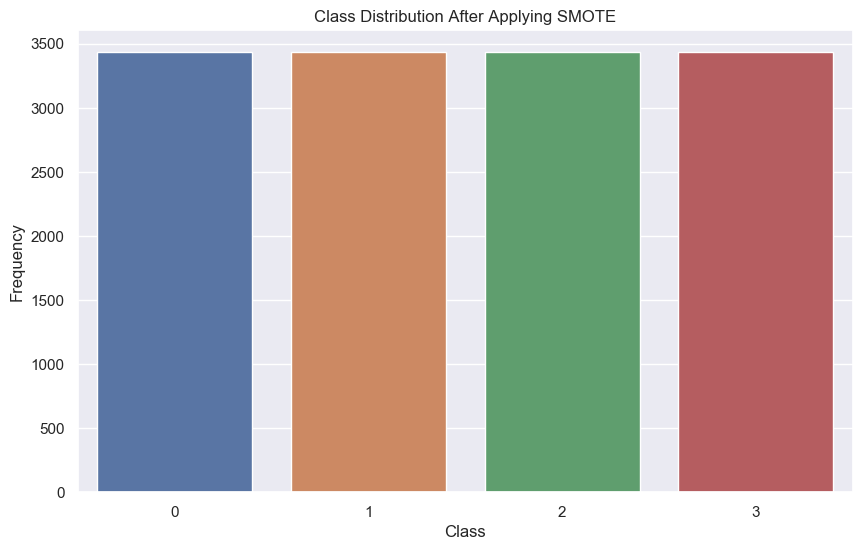

In [76]:
# Visualize the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution After Applying SMOTE')
plt.show()


## Performance Metrics Evaluation:

In [77]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [78]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, testY,predict):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

## Gradient Boost Classifier:

model loaded successfully
GradientBoostClassifier Accuracy    : 77.6969696969697
GradientBoostClassifier Precision   : 77.74917243007128
GradientBoostClassifier Recall      : 78.3456876406422
GradientBoostClassifier FSCORE      : 77.8447322258609

 GradientBoostClassifier classification report
                         precision    recall  f1-score   support

          Fine Imposed       0.72      0.77      0.74       803
        Warning Issued       0.73      0.82      0.77       877
        Product Recall       0.85      0.73      0.78       874
Investigation Launched       0.84      0.80      0.82       746

              accuracy                           0.78      3300
             macro avg       0.78      0.78      0.78      3300
          weighted avg       0.78      0.78      0.78      3300



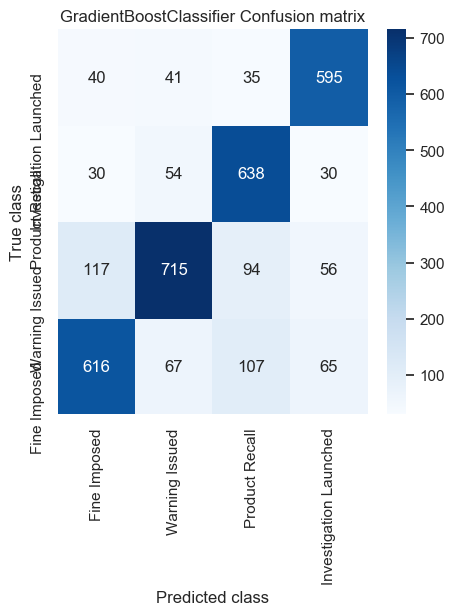

In [79]:
#gbc model:
if os.path.exists('GradientBoostClassifier.pkl'):
    #load the model:
    gbc=joblib.load('GradientBoostClassifier.pkl')
    print('model loaded successfully')
    predict=gbc.predict(x_test)
    calculateMetrics("GradientBoostClassifier",predict,y_test)
else:
    #train the model:
    gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.7, max_depth=3, random_state=42,)
    gbc.fit(x_resampled,y_resampled)
    #saving model:
    joblib.dump(gbc,'GradientBoostClassifier.pkl')
    print('model saved successfully')
    predict=gbc.predict(x_test)
    calculateMetrics("GradientBoostClassifier",predict,y_test)

## Knn classifier:

model loaded successfully
KNeighborsClassifier Accuracy    : 100.0
KNeighborsClassifier Precision   : 100.0
KNeighborsClassifier Recall      : 100.0
KNeighborsClassifier FSCORE      : 100.0

 KNeighborsClassifier classification report
                         precision    recall  f1-score   support

          Fine Imposed       1.00      1.00      1.00       803
        Warning Issued       1.00      1.00      1.00       877
        Product Recall       1.00      1.00      1.00       874
Investigation Launched       1.00      1.00      1.00       746

              accuracy                           1.00      3300
             macro avg       1.00      1.00      1.00      3300
          weighted avg       1.00      1.00      1.00      3300



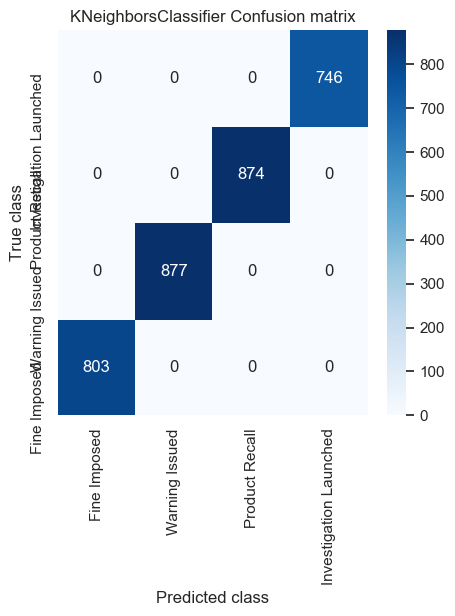

In [80]:
#knn model:
if os.path.exists('KNeighborsClassifier.pkl'):
    #load the model:
    knn=joblib.load('KNeighborsClassifier.pkl')
    print('model loaded successfully')
    predict=knn.predict(x_test)
    calculateMetrics("KNeighborsClassifier",predict,y_test)
else:
    #train the model:
    knn=KNeighborsClassifier()
    knn.fit(x_resampled,y_resampled)
    #saving model:
    joblib.dump(knn,'KNeighborsClassifier.pkl')
    print('model saved successfully')
    predict=knn.predict(x_test)
    calculateMetrics("KNeighborsClassifier",predict,y_test)

In [81]:
#showing all algorithms performance values
columns = ["Algorithm Name","Precison","Recall","FScore","Accuracy"]
values = []
algorithm_names = ["Gradient Boost Classifier",'KNeighbor Classifier']
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],precision[i],recall[i],fscore[i],accuracy[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,Precison,Recall,FScore,Accuracy
0,Gradient Boost Classifier,77.749172,78.345688,77.844732,77.69697
1,KNeighbor Classifier,100.000000,100.000000,100.000000,100.00000


In [94]:
# importing test dataset:
test=pd.read_csv("test.csv")


In [96]:
test.head()

,adulteration_id,product_name,brand,category,adulterant,detection_date,detection_method,severity,health_risk
0,508,Wine,BrandD,Beverages,Coloring agents,05-10-2024,Spectroscopy,Moderate,Low
1,819,Chicken,BrandD,Beverages,Water,05-10-2024,Microbiological Analysis,Moderate,Medium
2,453,Wine,BrandE,Bakery,Chalk,1/20/2024,Chemical Analysis,Minor,Low
3,369,Milk,BrandC,Condiments,Melamine,2/25/2024,Spectroscopy,Severe,High
4,243,Chicken,BrandD,Meat,Coloring agents,6/15/2024,Microbiological Analysis,Severe,High


In [97]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
adulteration_id     100 non-null int64
product_name        100 non-null object
brand               100 non-null object
category            100 non-null object
adulterant          100 non-null object
detection_date      100 non-null object
detection_method    100 non-null object
severity            100 non-null object
health_risk         100 non-null object
dtypes: int64(1), object(8)
memory usage: 7.2+ KB


In [86]:
labels

['Fine Imposed', 'Warning Issued', 'Product Recall', 'Investigation Launched']

## Label encoding

In [87]:
for column in test.columns:
    if test[column].dtype == 'object':
        test[column] = le.fit_transform(test[column])

In [88]:
# Make predictions on the selected test data
predict = knn.predict(test)
# Loop through each prediction and print the corresponding row
for i, p in enumerate(predict):
    if p == 0:
        print(test.iloc[i])
        print("Row {}:************************************************** Fine Imposed ".format(i))
    elif p==1:
        print(test.iloc[i])
        print("Row {}:************************************************** Warning Issued".format(i))
    elif p==2:
        print(test.iloc[i])
        print("Row {}:************************************************** Product Recall".format(i))
    elif p==3:
        print(test.iloc[i])
        print("Row {}:************************************************** Investigation Launched".format(i))
   
   

adulteration_id     508
product_name          8
brand                 3
category              1
adulterant            2
detection_date       49
detection_method      3
severity              1
health_risk           1
Name: 0, dtype: int64
Row 0:************************************************** Investigation Launched
adulteration_id     819
product_name          4
brand                 3
category              1
adulterant            4
detection_date       49
detection_method      1
severity              1
health_risk           2
Name: 1, dtype: int64
Row 1:************************************************** Investigation Launched
adulteration_id     453
product_name          8
brand                 4
category              0
adulterant            1
detection_date        5
detection_method      0
severity              0
health_risk           1
Name: 2, dtype: int64
Row 2:************************************************** Product Recall
adulteration_id     369
product_name          7
brand 

In [89]:
test['predict']=predict

In [90]:
test

,adulteration_id,product_name,brand,category,adulterant,detection_date,detection_method,severity,health_risk,predict
0,508,8,3,1,2,49,3,1,1,3
1,819,4,3,1,4,49,1,1,2,3
2,453,8,4,0,1,5,0,0,1,2
3,369,7,2,2,3,21,3,2,0,3
4,243,4,3,4,2,61,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...
95,672,2,2,2,4,1,3,1,1,3
96,560,7,0,3,3,39,3,2,2,3
97,594,5,3,1,2,58,3,1,1,3
98,259,4,1,1,0,15,2,1,2,3


In [91]:
mapping = {0: 'Fine Imposed', 1: 'Warning Issued', 2: 'Product Recall', 3: 'Investigation Launched'}

In [92]:
test['predict'] = test['predict'].map(mapping)

In [93]:
test

,adulteration_id,product_name,brand,category,adulterant,detection_date,detection_method,severity,health_risk,predict
0,508,8,3,1,2,49,3,1,1,Investigation Launched
1,819,4,3,1,4,49,1,1,2,Investigation Launched
2,453,8,4,0,1,5,0,0,1,Product Recall
3,369,7,2,2,3,21,3,2,0,Investigation Launched
4,243,4,3,4,2,61,1,2,0,Product Recall
...,...,...,...,...,...,...,...,...,...,...
95,672,2,2,2,4,1,3,1,1,Investigation Launched
96,560,7,0,3,3,39,3,2,2,Investigation Launched
97,594,5,3,1,2,58,3,1,1,Investigation Launched
98,259,4,1,1,0,15,2,1,2,Investigation Launched
